In [1]:
import self_dataset
from torch.utils.data import *
import self_dataset
import folder_tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import torch
from torch.utils.data import DataLoader, Subset, SubsetRandomSampler

from d2l import torch as d2l
import warnings  
warnings.filterwarnings("ignore", category=RuntimeWarning, module="mne")

import CNN

data_root="/mount/mount_dataset/driver_dataset/DROZY/DROZY"
output_root="/mount/mount_project/output_data/"



ModuleNotFoundError: No module named 'self_dataset'

# 验证网络结构

In [2]:
cnn=CNN.simple_cnn1d(input_channels=5,num_classes=10,list_down=[16,32,64,64,64])
import torch.nn.functional as F
from torchsummary import summary
summary(cnn,(5,3*2560),batch_size=3,device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [3, 16, 7680]             576
       BatchNorm1d-2              [3, 16, 7680]              32
              ReLU-3              [3, 16, 7680]               0
         MaxPool1d-4              [3, 16, 3839]               0
            Conv1d-5              [3, 32, 1920]           1,568
       BatchNorm1d-6              [3, 32, 1920]              64
              ReLU-7              [3, 32, 1920]               0
            Conv1d-8               [3, 64, 960]           6,208
       BatchNorm1d-9               [3, 64, 960]             128
             ReLU-10               [3, 64, 960]               0
           Conv1d-11               [3, 64, 480]          12,352
      BatchNorm1d-12               [3, 64, 480]             128
             ReLU-13               [3, 64, 480]               0
           Conv1d-14               [3, 

In [3]:
##
data_path_dict=folder_tree.get_data_path(data_root=data_root)
output_path_dic=folder_tree.get_out_path(output_root=output_root)

info_table=pd.read_csv(output_path_dic["info_file"])
train_data_table,test_data_table=train_test_split(info_table,test_size=0.2,shuffle=False)

train_dataset=self_dataset.table_control_dataset_fullload(train_data_table,data_root=data_root,output_root=output_root,Mintime=15)
train_dataloader=DataLoader(train_dataset,batch_size=64)

test_dataset=self_dataset.table_control_dataset_fullload(test_data_table,data_root=data_root,output_root=output_root)
test_dataloader=DataLoader(test_dataset,batch_size=512)

In [6]:
len(train_dataloader)

41

In [5]:
epochs=5
for epoch in range(epochs):
    for data in train_dataloader:
        pass

KeyboardInterrupt: 

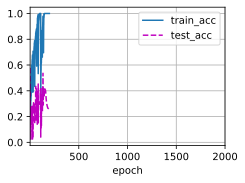

In [7]:
import torch
import sklearn as sk
from sklearn.metrics import precision_score, recall_score, f1_score
device=torch.device("cuda")
device
net=cnn
net.to(device)

optim=torch.optim.SGD(net.parameters(),lr=0.05,weight_decay=5e-4)
loss=torch.nn.CrossEntropyLoss().to(device="cuda")
num_epochs=2000
animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                        legend=['train_acc','test_acc'])   

timer, num_batches = d2l.Timer(), len(train_dataloader)
for epoch in range(num_epochs):
    metric_train = d2l.Accumulator(2)
    net.train()
    for i,data_dict in enumerate(train_dataloader):
        optim.zero_grad()
        x=data_dict["data"].to(torch.float32).to(device)     
        y=data_dict["LEVEL"].long().to(device)
        y_hat=net(x)
        l=F.cross_entropy(y_hat, y)
        l.mean().backward()
        optim.step()     
        pre=torch.argmax(y_hat.detach().cpu(),dim=1)
        num_true=sum(pre==y.cpu())
        metric_train.add(num_true,y.numel())
        if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
            animator.add(epoch + (i + 1) / num_batches, (metric_train[0]/metric_train[1],None))
    
    net.eval()
    metric_test = d2l.Accumulator(2)
    # for data_dict in test_dataloader:
    #     x=data_dict["data"].to(torch.float32).to(device)
    #     y=data_dict["LEVEL"].long().to(device)
    #     y_hat=net(x)
    #     pre=torch.argmax(y_hat.detach().cpu(),dim=1)
    #     num_true=sum(pre==y.cpu())
    #     metric_test.add(num_true,y.numel())
    # animator.add(epoch+ 1, (None,metric_test[0]/metric_test[1]))
    print(metric_test[0]/metric_test[1])
    

KeyboardInterrupt: 

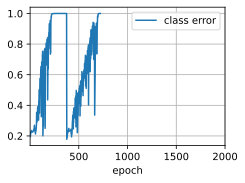

In [9]:
import torch
import sklearn as sk
from sklearn.metrics import precision_score, recall_score, f1_score
device=torch.device("cuda")
device
net=cnn
net.to(device)

optim=torch.optim.SGD(net.parameters(),lr=0.2,weight_decay=5e-4)
loss=torch.nn.CrossEntropyLoss().to(device="cuda")
num_epochs=2000
animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                        legend=['class error'])   
for epoch in range(num_epochs):
    metric_train = d2l.Accumulator(2)
    net.train()
    for i,data_dict in enumerate(train_dataloader):
        optim.zero_grad()
        x=data_dict["data"].to(torch.float32).to(device)     
        y=data_dict["LEVEL"].long().to(device)
        y_hat=net(x)
        l=F.cross_entropy(y_hat, y)
        l.mean().backward()
        optim.step()     
        pre=torch.argmax(y_hat.detach().cpu(),dim=1)
        num_true=sum(pre==y.cpu())
        metric_train.add(num_true,y.numel())
    animator.add(epoch+ 1, metric_train[0]/metric_train[1])
    